In [102]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 


In [103]:
!pip install matplotlib seaborn



[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [104]:
import warnings
warnings.simplefilter("ignore")

In [105]:
df = pd.read_csv("train.csv")
df.head()

,Unnamed: 0,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,25629,INN25630,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
1,14473,INN14474,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
2,23720,INN23721,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
3,5843,INN05844,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
4,18709,INN18710,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled


In [106]:
df.columns
df.drop(columns=["Unnamed: 0", "Booking_ID"], inplace=True)

In [107]:
df.isnull().sum()
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [108]:
df.shape

(21359, 18)

In [109]:
df["no_of_adults"].value_counts()

no_of_adults
2    15489
1     3996
3     1748
0      113
4       13
Name: count, dtype: int64

In [110]:
df["no_of_children"].value_counts()

no_of_children
0     19251
1      1257
2       837
3        11
9         2
10        1
Name: count, dtype: int64

In [111]:
df["no_of_previous_cancellations"].value_counts()

no_of_previous_cancellations
0     21135
1       115
2        36
3        32
11       20
5        10
4         9
13        1
6         1
Name: count, dtype: int64

In [112]:
cat_cols = ['type_of_meal_plan','required_car_parking_space',
       'room_type_reserved','market_segment_type', 'repeated_guest','booking_status']

num_cols = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights','lead_time', 'arrival_year', 'arrival_month',
       'arrival_date','no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests']

In [113]:
###EDA##
data = df.copy()
data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
1,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
2,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
3,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
4,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled


In [114]:
#UNIVARTATE ANALYSIS#

In [115]:
def num_plot_dist(df, num_features):
    fig, axis = plt.subplots(len(num_features), 2, figsize=(15, len(num_features)*5))
    if len(num_features) == 1:
        axes = [axes]

    for i,column in enumerate(num_features):
        sns.histplot(data=df, x=column, kde=True, ax=axis[i][0], palette="Blues")
        axis[i][0].set_title(f"Histogram of {column}")

        sns.boxplot(data=df, x=column, ax=axis[i][1], palette="Blues")
        axis[i][1].set_title(f"Boxplot of {column}")

    plt.tight_layout()
    plt.show()

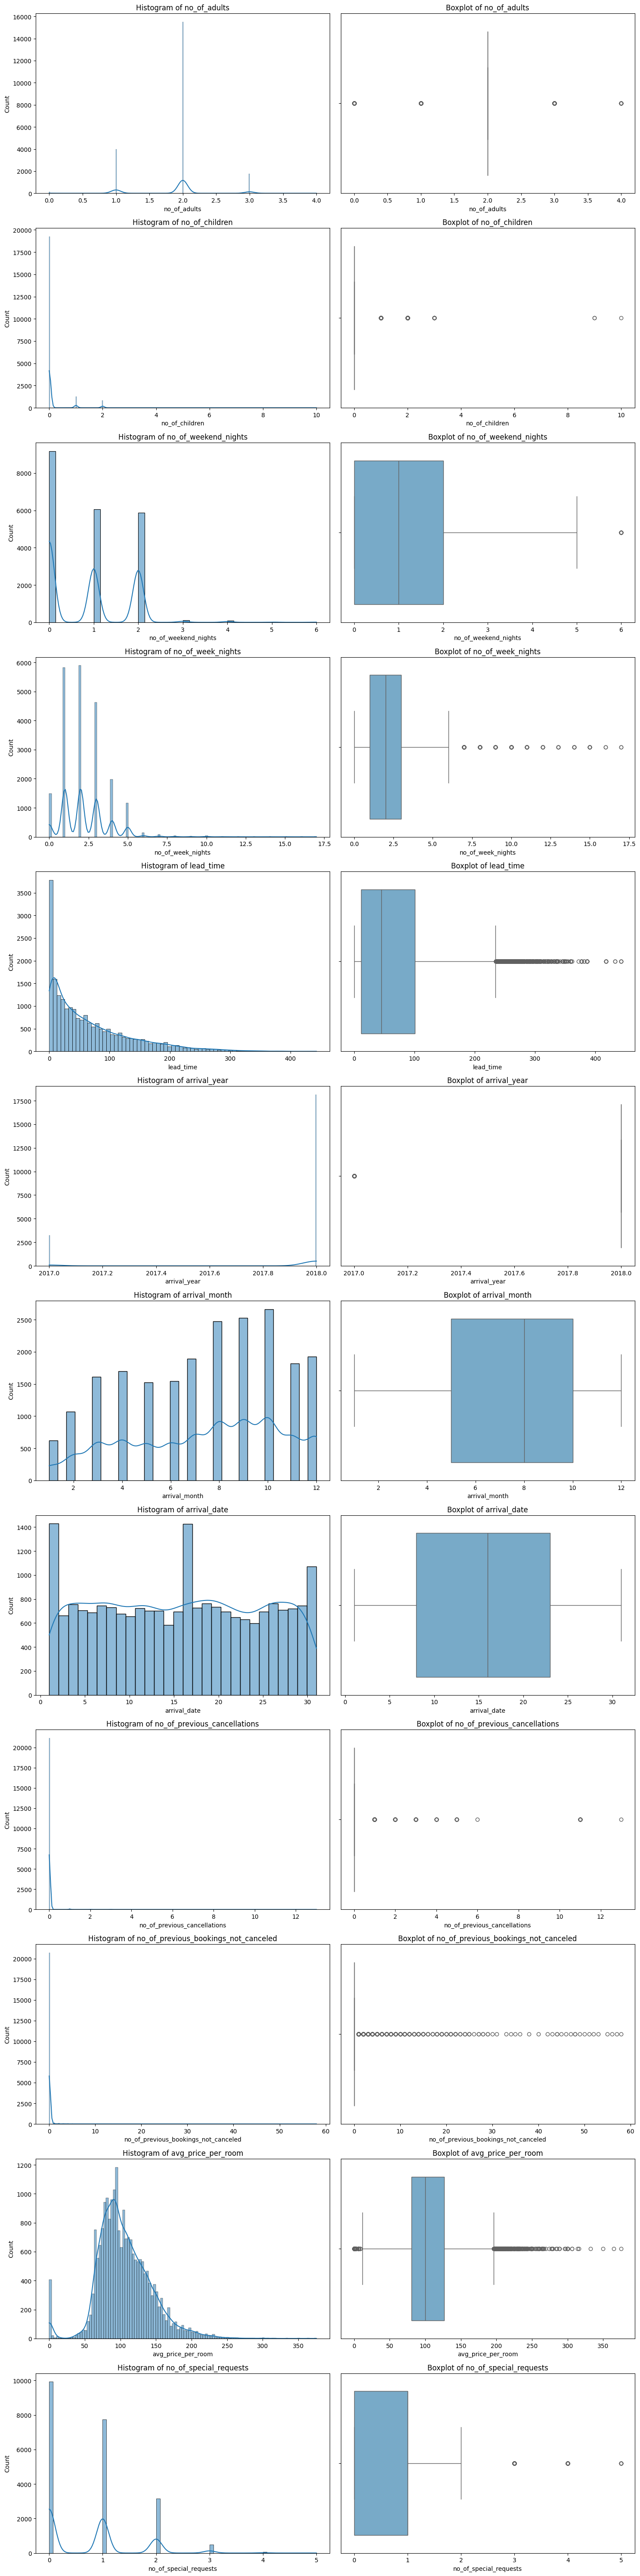

In [116]:
num_plot_dist(data, num_cols)

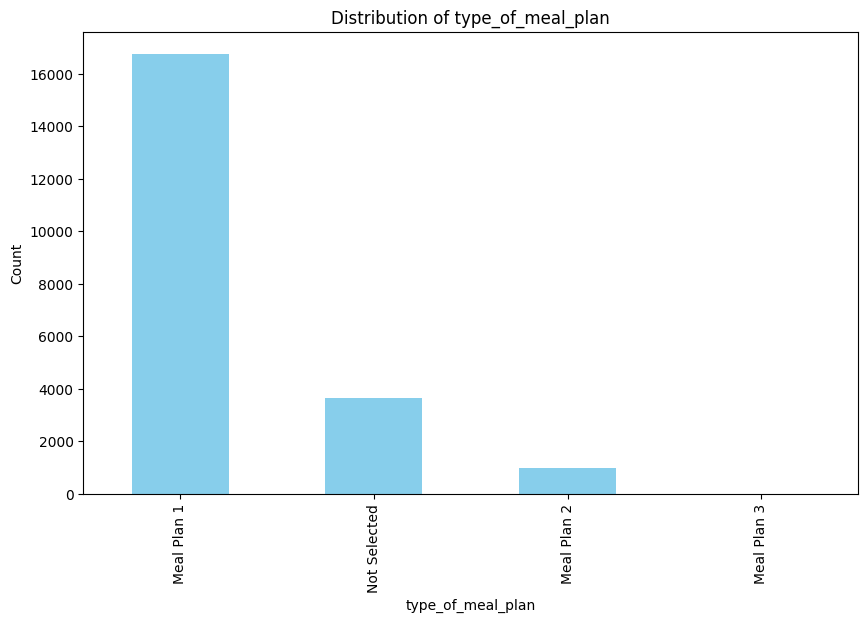

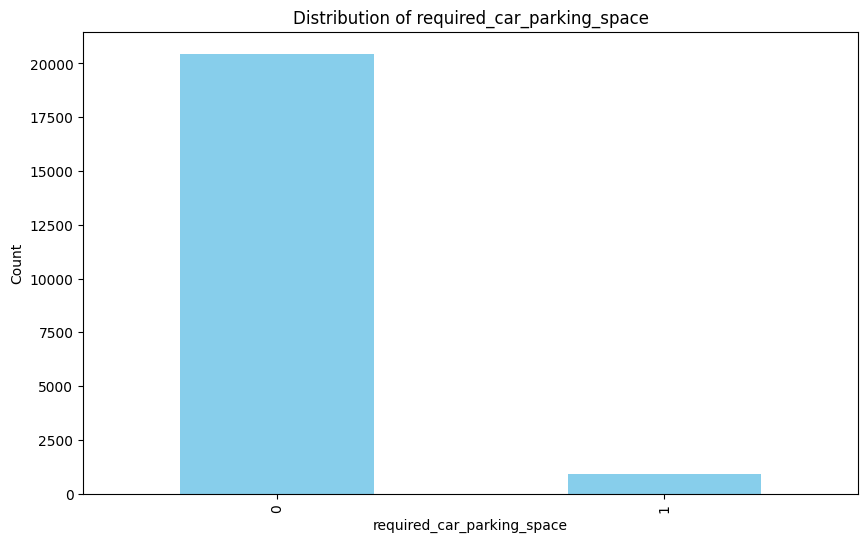

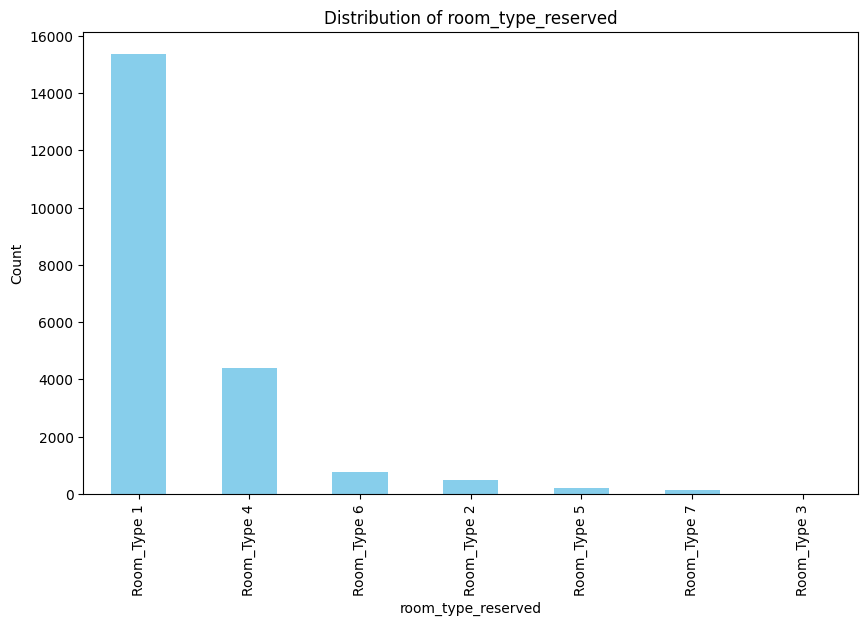

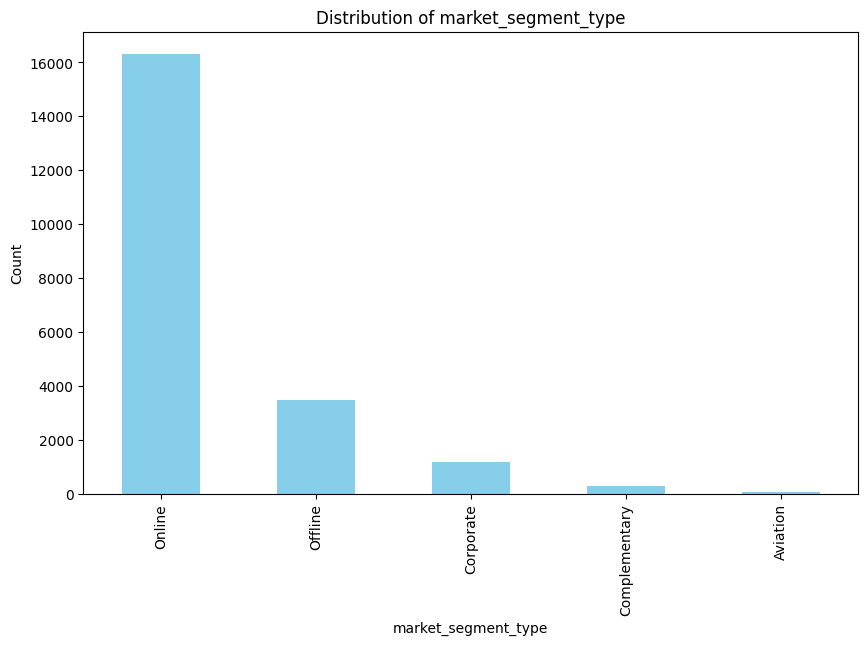

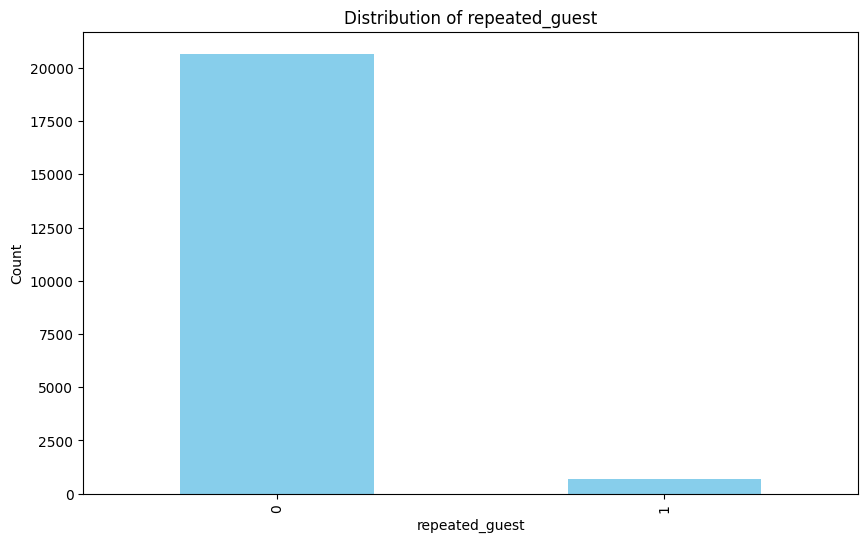

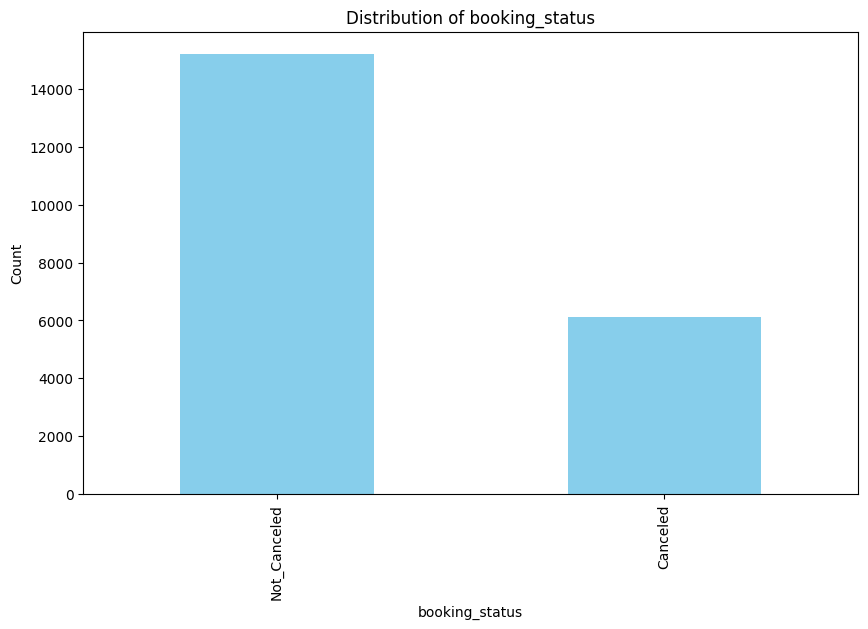

In [117]:
for cat_features in cat_cols:
    plt.figure(figsize=(10, 6))
    data[cat_features].value_counts().plot(kind='bar', color='skyblue')
    plt.title(f"Distribution of {cat_features}")
    plt.xlabel(cat_features)
    plt.ylabel("Count")
    plt.show()

In [118]:
##### BIVARIATE ANALYSIS #####

In [119]:
def plot_bivariate_num(df, target, num_features):
    num_plots = len(num_features)
    num_rows = (num_plots + 1) // 2

    fig, axes = plt.subplots(num_rows, 2, figsize=(15, num_rows * 5))
    axes = axes.flatten()

    for i, column in enumerate(num_features):
        sns.boxplot(data=df, x=target, y=column, ax=axes[i], palette="Blues")
        axes[i].set_title(f"Boxplot of {column} by {target}")
    
    plt.tight_layout()
    plt.show()
    

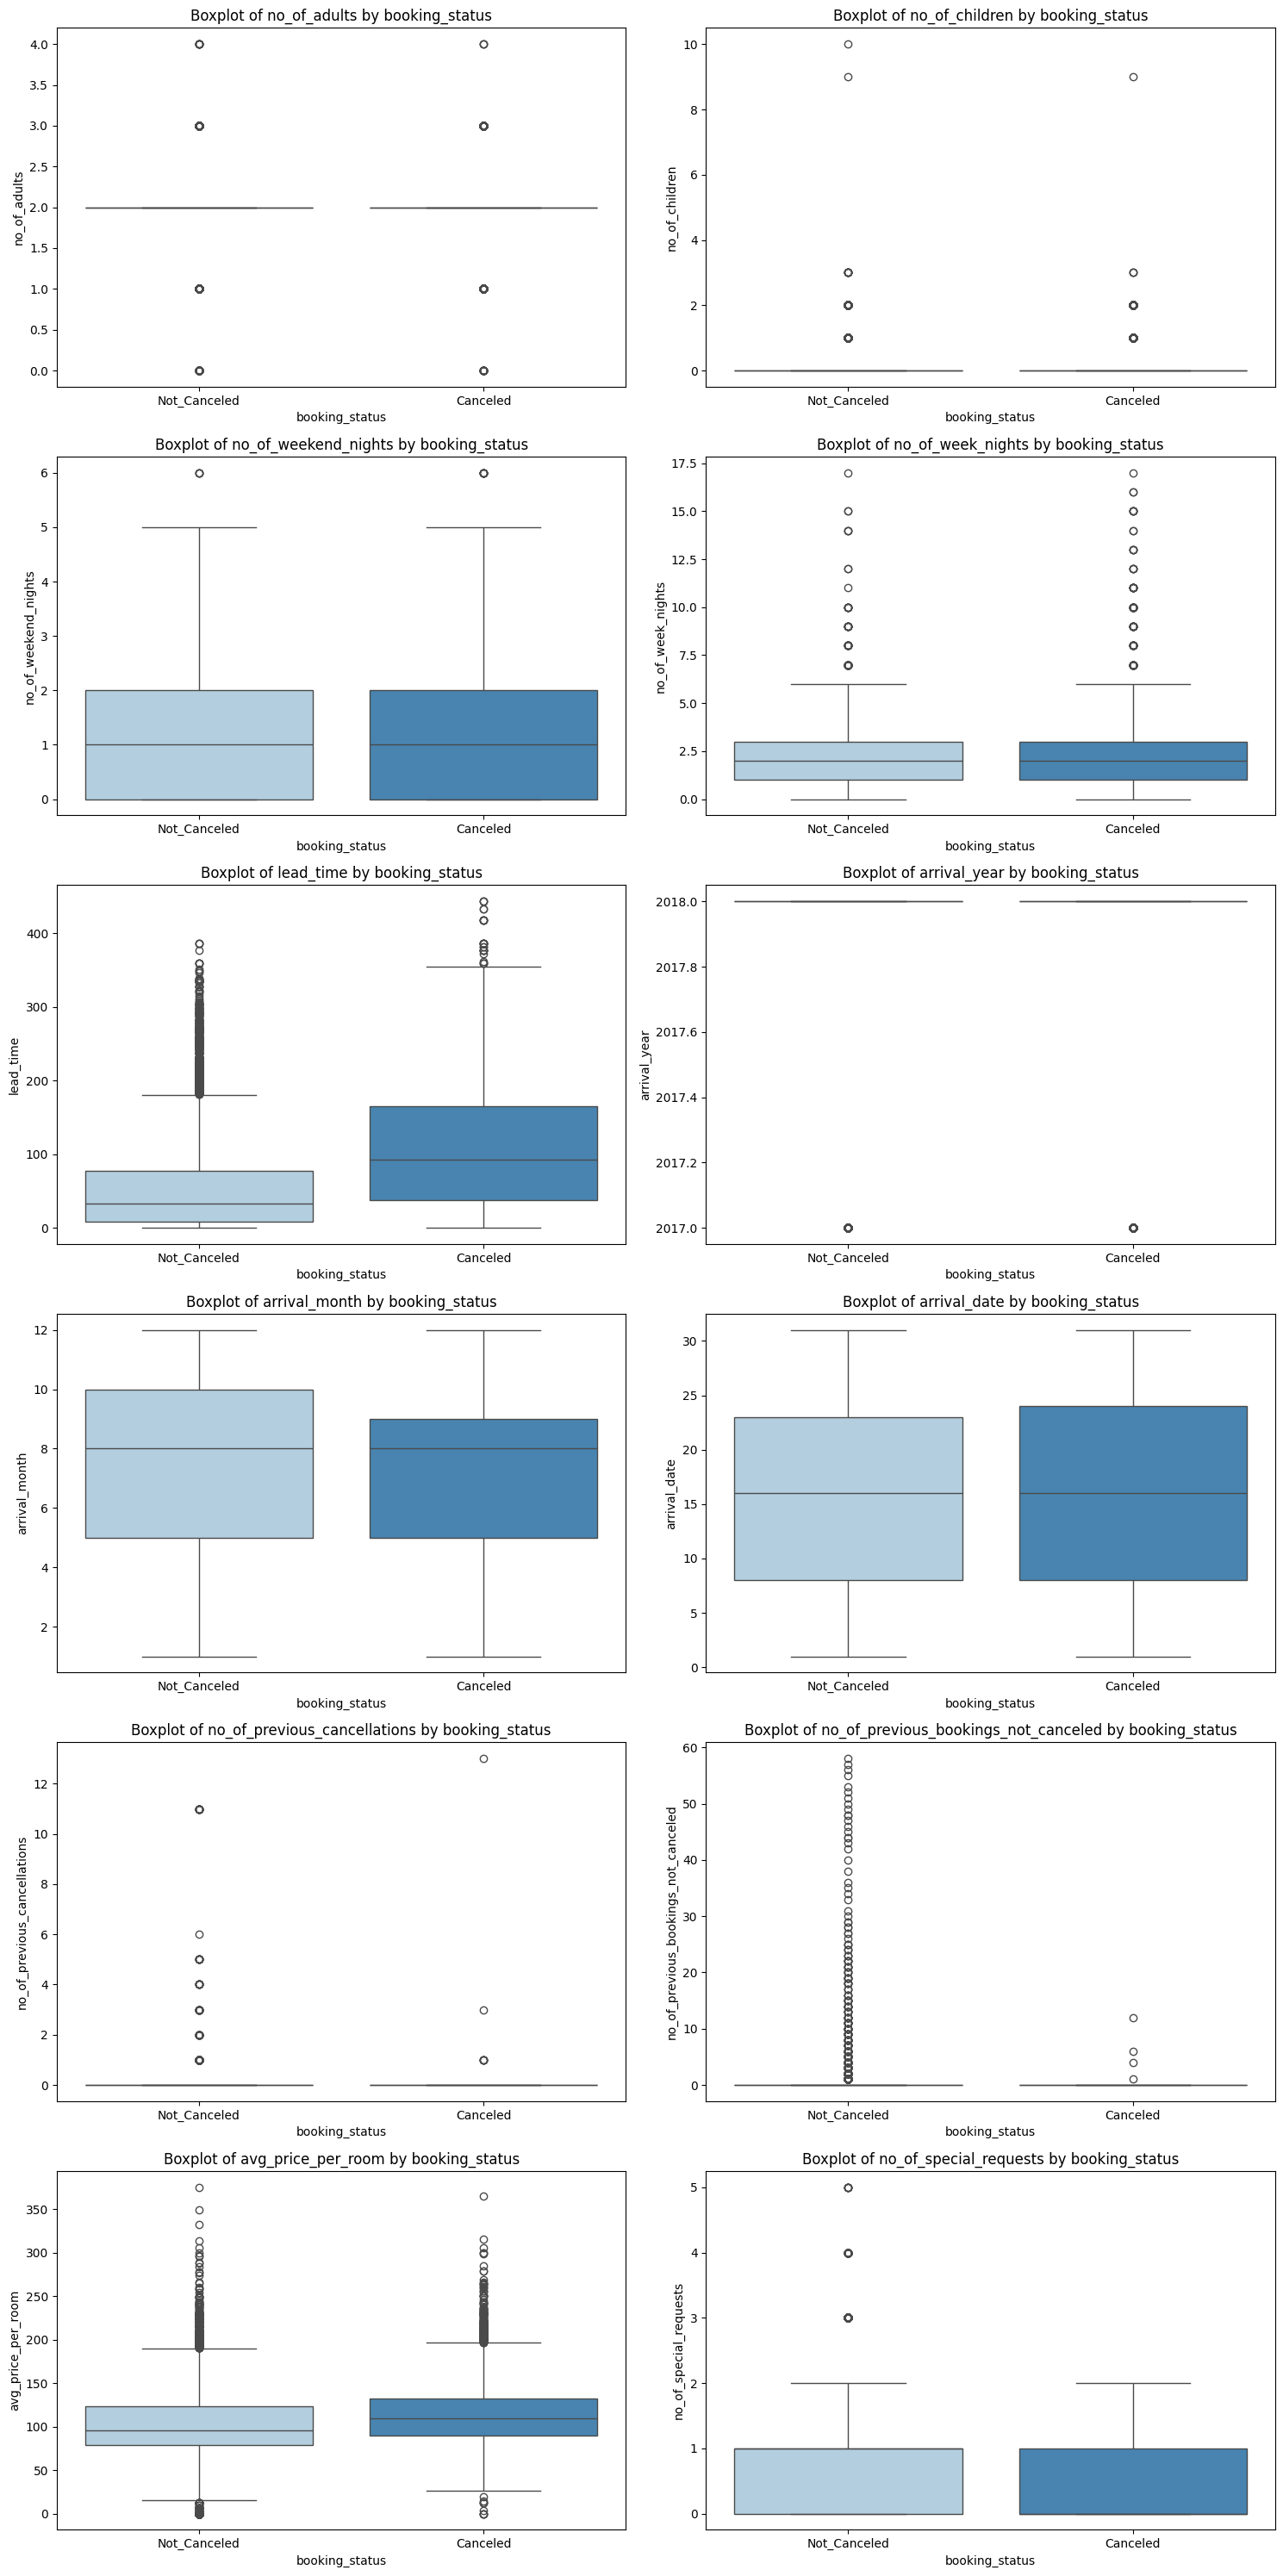

In [120]:
plot_bivariate_num(data, 'booking_status', num_cols)

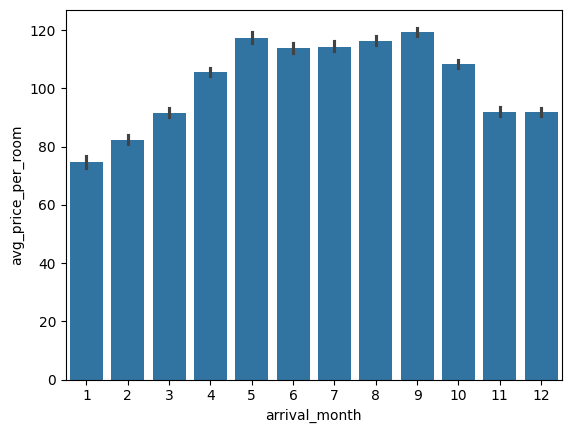

In [121]:
sns.barplot(x='arrival_month', y='avg_price_per_room', data=data)
plt.show()

In [122]:
def plot_bivariate_cat(df, target, cat_features):

    num_features = len(cat_features)
    num_rows = (num_features + 1) // 2
    
    fig, axes = plt.subplots(num_rows, 2, figsize=(15, num_rows * 5))
    axes = axes.flatten()

    for i, feature in enumerate(cat_features):
        sns.countplot(data=df, x=feature, hue=target, ax=axes[i], palette='Set2')
        axes[i].set_title(f'{feature} vs {target}')
        axes[i].tick_params(axis='x', rotation=90)
    
    plt.tight_layout()
    plt.show()

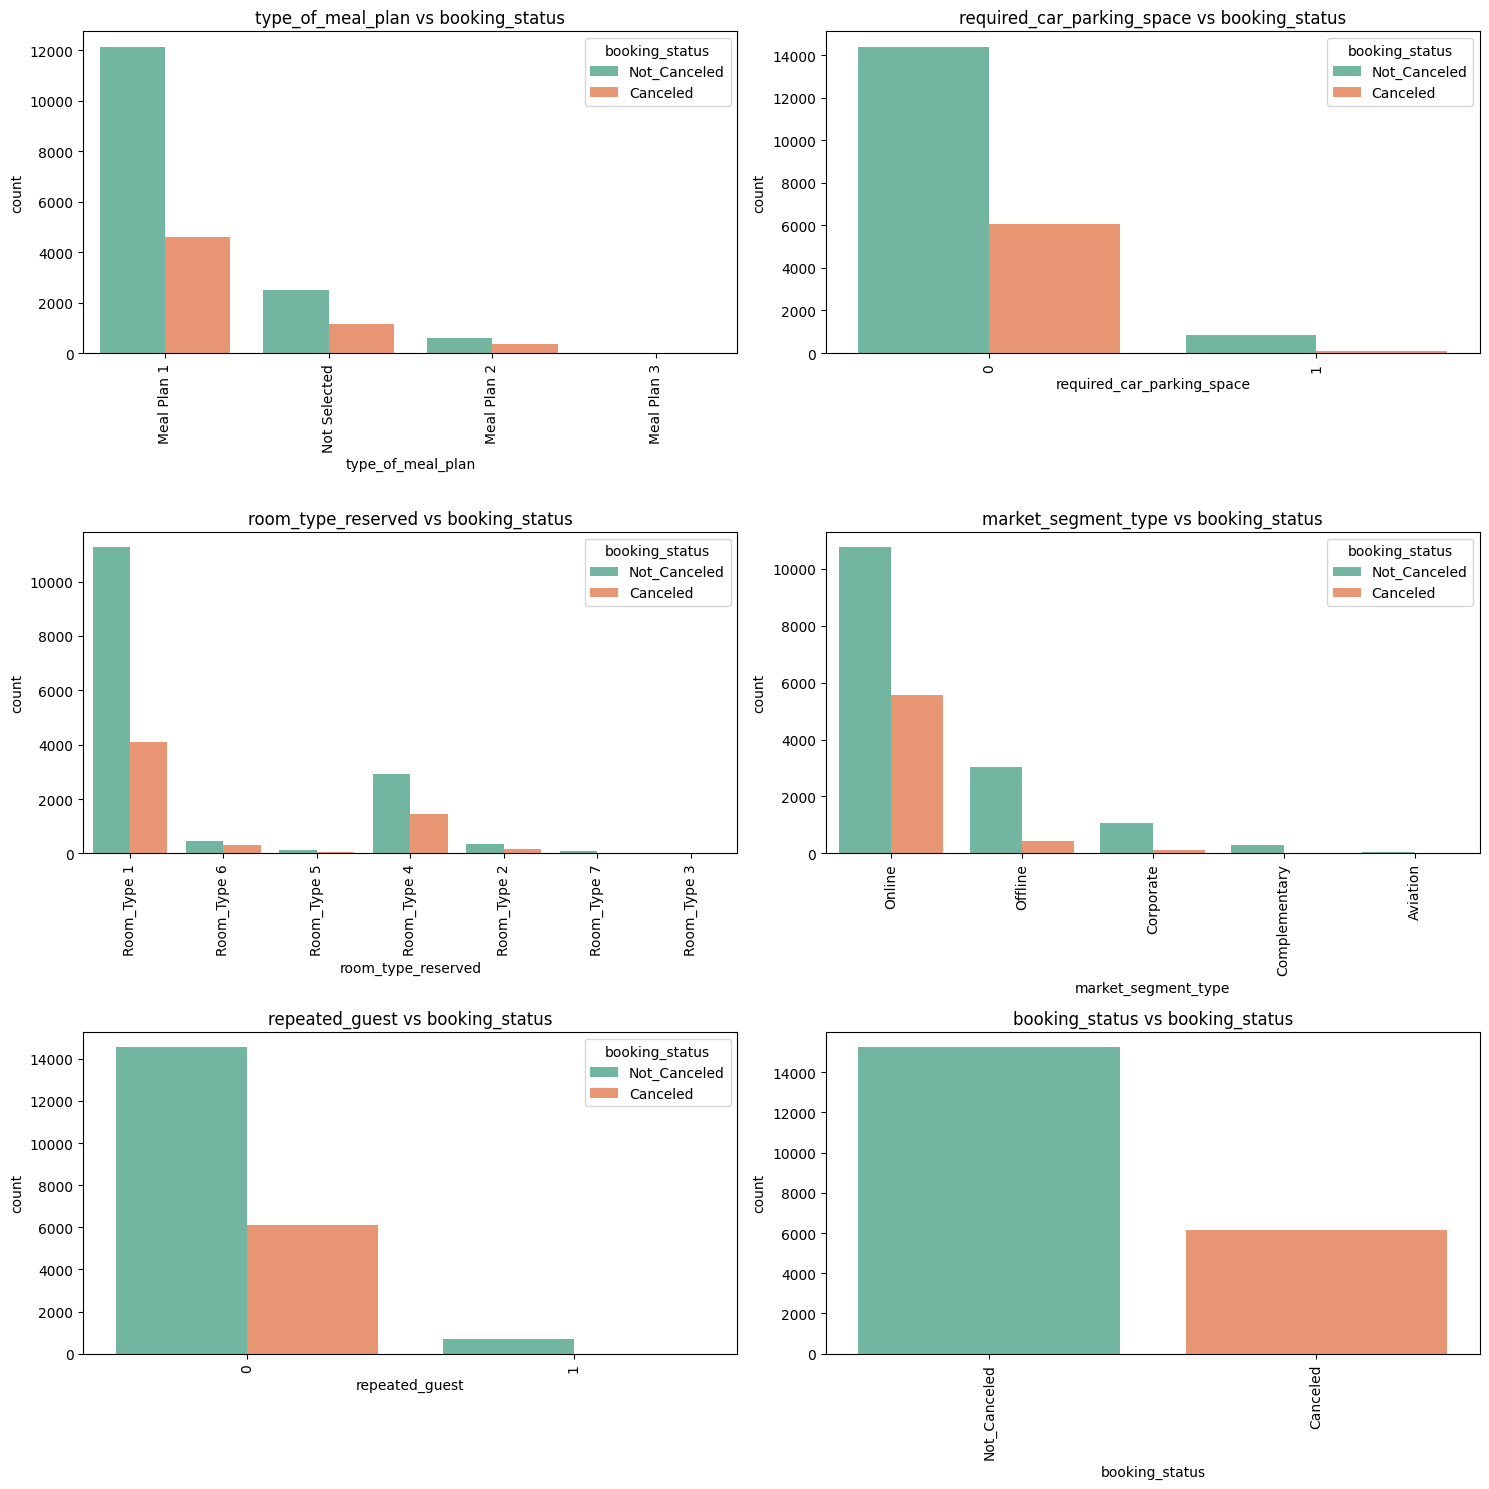

In [123]:
plot_bivariate_cat(data, 'booking_status', cat_cols)


df.head()

In [124]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
1,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
2,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
3,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
4,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled


In [125]:
###Label encoding ###
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
mappings={}

for col in cat_cols:
    df[col] = label_encoder.fit_transform(df[col])
    mappings[col] = {label:code for label,code in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))}

    

In [126]:
for label,code in mappings.items():
    print(f"{label}: {code}")

type_of_meal_plan: {'Meal Plan 1': np.int64(0), 'Meal Plan 2': np.int64(1), 'Meal Plan 3': np.int64(2), 'Not Selected': np.int64(3)}
required_car_parking_space: {np.int64(0): np.int64(0), np.int64(1): np.int64(1)}
room_type_reserved: {'Room_Type 1': np.int64(0), 'Room_Type 2': np.int64(1), 'Room_Type 3': np.int64(2), 'Room_Type 4': np.int64(3), 'Room_Type 5': np.int64(4), 'Room_Type 6': np.int64(5), 'Room_Type 7': np.int64(6)}
market_segment_type: {'Aviation': np.int64(0), 'Complementary': np.int64(1), 'Corporate': np.int64(2), 'Offline': np.int64(3), 'Online': np.int64(4)}
repeated_guest: {np.int64(0): np.int64(0), np.int64(1): np.int64(1)}
booking_status: {'Canceled': np.int64(0), 'Not_Canceled': np.int64(1)}


In [127]:
###Multicolinearity###

!pip install statsmodels


[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [128]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [129]:
x = add_constant(df)
vif_data = pd.DataFrame()
vif_data["feature"] = x.columns
vif_data["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

In [130]:
vif_data

,feature,VIF
0,const,4.100197e+07
1,no_of_adults,1.341180e+00
2,no_of_children,1.282459e+00
3,no_of_weekend_nights,1.073215e+00
4,no_of_week_nights,1.125260e+00
5,type_of_meal_plan,1.178228e+00
6,required_car_parking_space,1.036105e+00
7,room_type_reserved,1.549859e+00
8,lead_time,1.406287e+00
9,arrival_year,1.288533e+00


<Axes: >

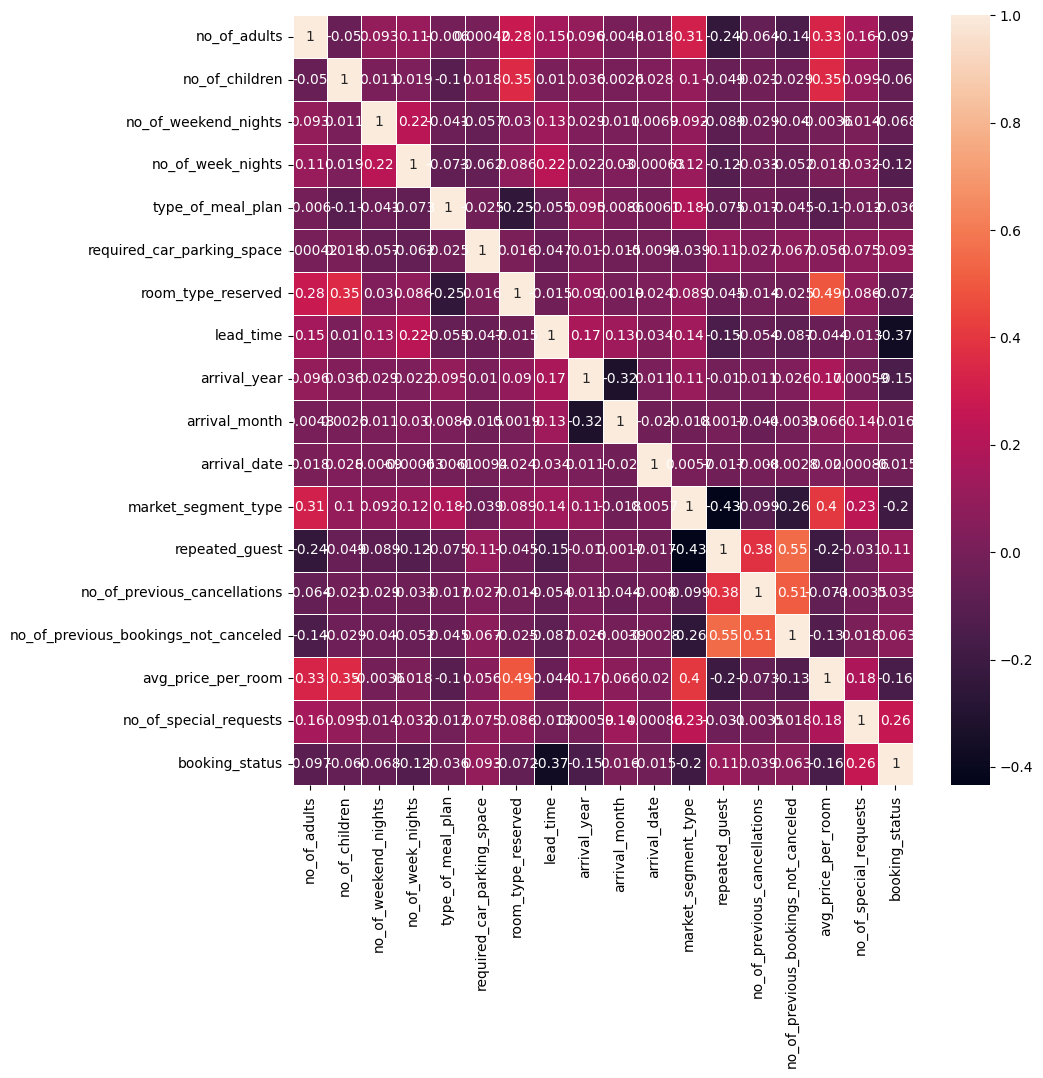

In [131]:
## our data dont have any multi colinearity ##

corr = df.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, linewidths=0.5)

In [132]:
##skewness##
skewness = df.skew()
skewness

no_of_adults                            -0.305652
no_of_children                           4.165696
no_of_weekend_nights                     0.636637
no_of_week_nights                        1.553657
type_of_meal_plan                        1.650716
required_car_parking_space               4.538315
room_type_reserved                       1.392145
lead_time                                1.405258
arrival_year                            -1.953273
arrival_month                           -0.293266
arrival_date                             0.010333
market_segment_type                     -2.333046
repeated_guest                           5.282330
no_of_previous_cancellations            22.001489
no_of_previous_bookings_not_canceled    16.735934
avg_price_per_room                       0.542888
no_of_special_requests                   0.922373
booking_status                          -0.942305
dtype: float64

In [133]:
for col in df.columns:
    if skewness[col] > 5:
        df[col] = np.log1p(df[col])

In [134]:
## handling imbalanced data ##
df["booking_status"].value_counts()

booking_status
1    15231
0     6128
Name: count, dtype: int64

In [135]:
X = df.drop(columns = "booking_status")
y = df["booking_status"]
X.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests'],
      dtype='object')

In [136]:
!pip install imbalanced-learn


[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [137]:
y.value_counts()

booking_status
1    15231
0     6128
Name: count, dtype: int64

In [138]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
x_res, y_res = smote.fit_resample(X,y)

In [139]:
pd.Series(y_res)

0        1
1        1
2        0
3        1
4        0
        ..
30457    0
30458    0
30459    0
30460    0
30461    0
Name: booking_status, Length: 30462, dtype: int64

In [140]:
y_res.value_counts()

booking_status
1    15231
0    15231
Name: count, dtype: int64

In [141]:
balanced_df = pd.DataFrame(x_res, columns=X.columns)
balanced_df['booking_status'] = y_res

In [142]:
balanced_df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,0,0,0,26,2017,10,17,4,0.0,0.0,0.0,161.00,0,1
1,2,1,1,1,0,0,0,98,2018,7,16,4,0.0,0.0,0.0,121.50,2,1
2,2,0,0,3,0,0,0,433,2018,9,8,3,0.0,0.0,0.0,70.00,0,0
3,2,0,2,5,0,0,0,195,2018,8,8,3,0.0,0.0,0.0,72.25,0,1
4,1,0,0,2,0,0,0,188,2018,6,15,3,0.0,0.0,0.0,130.00,0,0


In [143]:
df = balanced_df.copy()

In [144]:
### feature selection ###
from sklearn.ensemble import RandomForestClassifier
x = df.drop(columns='booking_status')
y = df["booking_status"]

In [145]:
model = RandomForestClassifier(random_state=42)
model.fit(x, y)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [146]:
feature_importance = model.feature_importances_
feature_importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': feature_importance
})

In [147]:
top_features_importance_df = feature_importance_df.sort_values(by="importance", ascending=False)

In [148]:
top_10_features = top_features_importance_df["feature"].head(10).values
top_10_df = df[top_10_features.tolist() + ["booking_status"]]

In [149]:
df = top_10_df.copy()

In [150]:
##model selection##

In [151]:
!pip install xgboost lightgbm


[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [152]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier




In [153]:
X = df.drop(columns='booking_status')
y = df['booking_status']

In [154]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [155]:
classifiers = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Support Vector Classifier": SVC(random_state=42),
    "Decision tree": DecisionTreeClassifier(random_state=42),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "XGBoost": XGBClassifier(),
    "Adaboost": AdaBoostClassifier(random_state=42),
    "LGBM": LGBMClassifier(),
}

In [156]:
metrics = {
    "Model": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1 Score": []
}

In [157]:
for model_name, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    metrics["Model"].append(model_name)
    metrics["Accuracy"].append(accuracy)
    metrics["Precision"].append(precision)
    metrics["Recall"].append(recall)
    metrics["F1 Score"].append(f1)
    

[LightGBM] [Info] Number of positive: 12161, number of negative: 12208
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001484 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 601
[LightGBM] [Info] Number of data points in the train set: 24369, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499036 -> initscore=-0.003857
[LightGBM] [Info] Start training from score -0.003857


In [158]:
##training Raondom forest##
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [159]:
X = df.drop(columns='booking_status')
y = df['booking_status']

In [160]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [161]:
rf = RandomForestClassifier(random_state=42)
params_dist = {
    'n_estimators': randint(100, 500),
    'max_depth': randint(10, 50),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5),
    'bootstrap': [True, False]
}

In [162]:
random_search = RandomizedSearchCV(estimator=rf, param_distributions=params_dist, n_iter=5, cv=5, verbose=2, random_state=42, scoring='accuracy')

In [163]:
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   7.6s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   5.9s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   5.9s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   5.4s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   6.6s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=   9.5s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=   9.4s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=   8.5s
[CV]

,estimator,RandomForestC...ndom_state=42)
,param_distributions,"{'bootstrap': [True, False], 'max_depth': <scipy.stats....00155F1A97620>, 'min_samples_leaf': <scipy.stats....00155F4817740>, 'min_samples_split': <scipy.stats....00155EBB83D70>, ...}"
,n_iter,5
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [164]:
random_search.best_params_

{'bootstrap': False,
 'max_depth': 33,
 'min_samples_leaf': 3,
 'min_samples_split': 7,
 'n_estimators': 408}

In [165]:
best_rf_model = random_search.best_estimator_
y_pres = best_rf_model.predict(X_test)

In [166]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [167]:
accuracy

0.8667323157721976

In [168]:
## save this model ##

import joblib

joblib.dump(best_rf_model, "random_forest.pkl")
loaded_model = joblib.load("random_forest.pkl")